<a href="https://colab.research.google.com/github/Nusnan-AM/Final_waterQualty_Models/blob/main/Final_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 20180501_174635.jpg
 20180501_174733.jpg
 20180501_174736.jpg
 application-aptitude-2020.pdf
'augment_data1 (1).csv'
 augment_data1.csv
 catboost_info
'Colab Notebooks'
 Colour_Final.csv
 colour_random_jar_model.pkl
'Contact '
'Contact Information.gform'
'Copy of augment_data1.csv'
'Copy of randomforest (1).ipynb'
'Copy of randomforest.ipynb'
'CRM Backend.gsheet'
'CST20083  AM.NUSNAN.mp4'
'CST382-3_1_Introduction (1).gslides'
'CST382-3_2_Sampling and Quantization.gslides'
'CST WAD  Group - C.gdoc'
 data.csv
'Design Documentation on Boarding Project.gdoc'
'Document from Serial Ghost'
 DSC_0004.JPG
 DSC_0087.JPG
 DSC_0089.JPG
 DSC_0096.JPG
 DSC_0100.JPG
 DSC_0105.JPG
 DSC_0106.JPG
 DSC_0107.JPG
 DSC_0109.JPG
 DSC_0110_1.JPG
 DSC_0111_1.JPG
 DSC_0113.JPG
 DSC_0114_1.JPG
 DSC_0114.JPG
 DSC_011

In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
data_PH = pd.read_csv("Final_ph.csv")
data_EC = pd.read_csv("Final_ec.csv")
data_Turbidity = pd.read_csv("Final_turbidity.csv")
data_Colour = pd.read_csv("Final_colour.csv")
data_TDS = pd.read_csv("Final_tds.csv")

In [ ]:
data_PH.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,1/1/2019,500.0,74.7,118.4,64.60,7.32,7.08,7.03,7.06,7.09,...,6.98,6.93,6.83,6.78,2.5,0.52,0.65,20000,4160,5200
1,1/2/2019,484.0,46.7,123.8,67.87,8.51,8.84,8.25,8.37,8.54,...,7.72,7.74,7.71,7.74,0.5,0.20,0.20,4000,1600,1600
2,1/3/2019,326.0,42.1,169.5,78.30,7.43,7.67,7.55,7.43,7.42,...,7.65,7.60,7.54,7.61,4.0,0.65,0.30,32000,5200,2400
3,1/7/2019,454.0,43.4,124.5,68.10,7.16,7.04,7.11,7.05,7.10,...,6.91,6.88,6.89,6.72,1.0,0.18,0.20,8000,1440,1600
4,1/8/2019,307.0,38.3,118.4,86.32,7.09,6.91,6.88,6.86,6.84,...,6.86,6.85,6.84,6.96,3.0,0.15,0.30,24000,1200,2400


In [ ]:
data_EC.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,148.1,137.2,144.1,130.1,...,150.0,2.5,0.52,0.65,20000,4160,5200,NaN,NaN,NaN
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,180.6,160.4,169.5,160.7,...,165.2,0.5,0.20,0.20,4000,1600,1600,NaN,NaN,NaN
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,180.3,182.3,180.1,180.2,...,164.5,4.0,0.65,0.30,32000,5200,2400,NaN,NaN,NaN
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,145.2,142.1,141.4,141.3,...,144.7,1.0,0.18,0.20,8000,1440,1600,NaN,NaN,NaN
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,130.3,128.4,126.1,127.3,...,148.8,3.0,0.15,0.30,24000,1200,2400,NaN,NaN,NaN


In [ ]:
data_Turbidity.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,27.2,16.3,74.9,36.0,...,0.61,0.63,0.32,0.84,2.5,0.52,0.65,20000,4160,5200
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,45.7,28.3,14.9,15.7,...,0.40,0.60,0.31,0.42,0.5,0.20,0.20,4000,1600,1600
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,33,31.2,32.6,41.5,...,0.76,0.65,0.78,1.56,4.0,0.65,0.30,32000,5200,2400
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,18.2,16.2,7.15,30.8,...,0.13,0.41,0.92,0.71,1.0,0.18,0.20,8000,1440,1600
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,38,20.6,26.9,25.8,...,0.97,1.00,0.42,0.58,3.0,0.15,0.30,24000,1200,2400


In [ ]:
data_Colour.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,420.0,155.0,500.0,500.0,...,0.0,2.0,0,0,2.5,0.52,0.65,20000,4160,5200
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,409.0,285.0,185.0,158.0,...,0.0,0.0,0,0,0.5,0.20,0.20,4000,1600,1600
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,101.0,90.0,85.0,72.0,...,2.0,3.0,9,10,4.0,0.65,0.30,32000,5200,2400
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,21.0,46.0,64.0,39.0,...,4.0,10.0,8,10,1.0,0.18,0.20,8000,1440,1600
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,124.0,249.0,153.0,210.0,...,0.0,0.0,11,13,3.0,0.15,0.30,24000,1200,2400


In [ ]:
X_ph = data_PH[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_ph = data_PH['clear_well']
X_ec = data_EC[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_ec = data_EC['clear_well']
X_turbidity = data_Turbidity[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_turbidity = data_Turbidity['clear_well']
X_colour = data_Colour[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_colour = data_Colour['clear_well']
X_tds = data_TDS[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_tds = data_TDS['clear_well']

# TDS

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 14083.4902 - mae: 116.5656 - val_loss: 12892.2314 - val_mae: 111.5468
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14491.6846 - mae: 111.1325 - val_loss: 8915.7441 - val_mae: 91.7867
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7728.5547 - mae: 82.8985 - val_loss: 2944.4089 - val_mae: 48.4539
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4374.2021 - mae: 44.2022 - val_loss: 1091.5317 - val_mae: 26.8858
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3277.4561 - mae: 28.7184 - val_loss: 983.7120 - val_mae: 25.0134
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1603.3364 - mae: 25.9481 - val_loss: 933.5575 - val_mae: 24.0807
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3304.8604 - mae: 25.2072 - val_loss: 869.8248 - val_mae: 23.5737
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3488.7026 - mae: 25.9217 - val_loss: 833.9433 - val_mae: 23.3025
Epoch 9/1

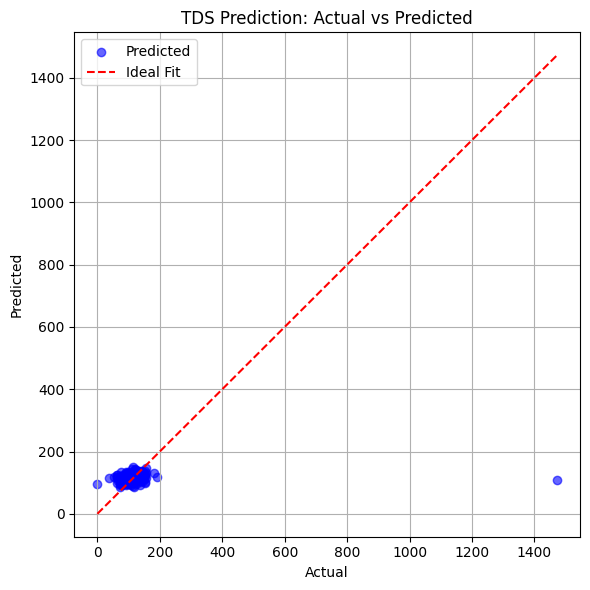

In [ ]:
X_tds_train, X_tds_test, y_tds_train, y_tds_test = train_test_split(X_tds, y_tds, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_tds_train_scaled = scaler.fit_transform(X_tds_train)
X_tds_test_scaled = scaler.transform(X_tds_test)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_tds_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_tds_train_scaled, y_tds_train, validation_split=0.2,
                    epochs=100, batch_size=16, verbose=1)


y_pred = model.predict(X_tds_test_scaled).flatten()


mae = mean_absolute_error(y_tds_test, y_pred)
mse = mean_squared_error(y_tds_test, y_pred)
r2 = r2_score(y_tds_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")


plt.figure(figsize=(6, 6))
plt.scatter(y_tds_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_tds_test.min(), y_tds_test.max()], [y_tds_test.min(), y_tds_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("TDS Prediction: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# PH

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 14640.9492 - mae: 116.8883 - val_loss: 12628.2139 - val_mae: 110.3056
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12447.0371 - mae: 108.1797 - val_loss: 8262.6045 - val_mae: 87.9626
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9307.9131 - mae: 80.7685 - val_loss: 2529.2083 - val_mae: 44.6716
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7974.7998 - mae: 43.8019 - val_loss: 1015.1373 - val_mae: 25.1855
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2185.1138 - mae: 26.9544 - val_loss: 929.8753 - val_mae: 23.9259
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2373.4392 - mae: 25.8003 - val_loss: 859.7456 - val_mae: 23.1137
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 922.3348 - mae: 22.8005 - val_loss: 817.3943 - val_mae: 22.5900
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5503.8916 - mae: 28.4100 - val_loss: 775.4244 - val_mae: 21.9774
Epoch 9/100

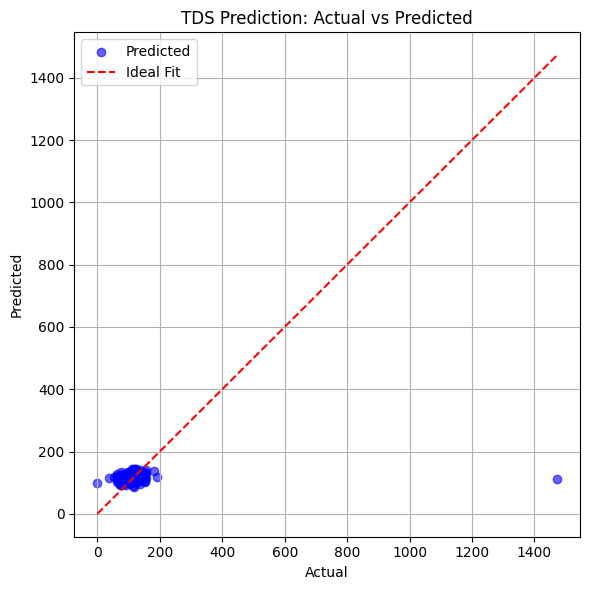

In [ ]:
X_ph_train, X_tds_test, y_tds_train, y_tds_test = train_test_split(X_tds, y_tds, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_tds_train_scaled = scaler.fit_transform(X_tds_train)
X_tds_test_scaled = scaler.transform(X_tds_test)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_tds_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_tds_train_scaled, y_tds_train, validation_split=0.2,
                    epochs=100, batch_size=16, verbose=1)


y_pred = model.predict(X_tds_test_scaled).flatten()


mae = mean_absolute_error(y_tds_test, y_pred)
mse = mean_squared_error(y_tds_test, y_pred)
r2 = r2_score(y_tds_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")


plt.figure(figsize=(6, 6))
plt.scatter(y_tds_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_tds_test.min(), y_tds_test.max()], [y_tds_test.min(), y_tds_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("TDS Prediction: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# EC

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 39366.2500 - mae: 195.4615 - val_loss: 36643.6719 - val_mae: 188.0141
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35500.5859 - mae: 184.6485 - val_loss: 27614.3633 - val_mae: 161.9239
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24261.5039 - mae: 150.8544 - val_loss: 12291.0977 - val_mae: 102.6730
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9766.5996 - mae: 89.0408 - val_loss: 3475.8604 - val_mae: 49.0023
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3495.8674 - mae: 47.1969 - val_loss: 2622.7488 - val_mae: 40.9649
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2486.2915 - mae: 40.0869 - val_loss: 2454.3391 - val_mae: 39.6061
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2472.4756 - mae: 40.0871 - val_loss: 2372.7222 - val_mae: 38.7501
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2437.7161 - mae: 39.3698 - val_loss: 2280.6484 - val_mae: 38.1095


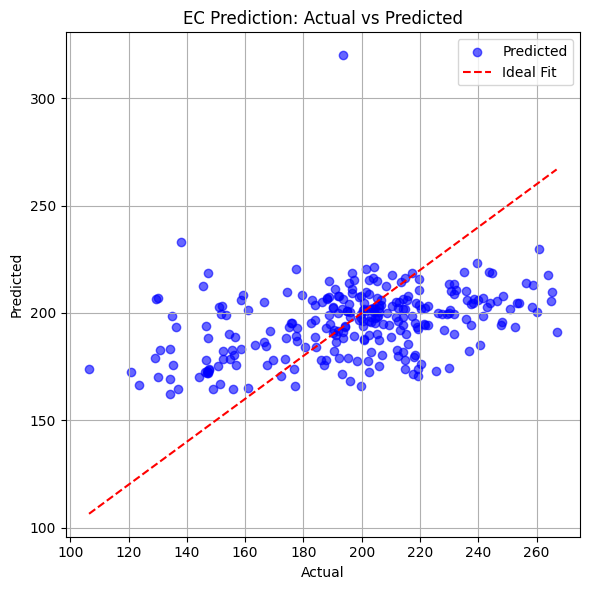

In [ ]:
X_ec_train, X_ec_test, y_ec_train, y_ec_test = train_test_split(X_ec, y_ec, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_ec_train_scaled = scaler.fit_transform(X_ec_train)
X_ec_test_scaled = scaler.transform(X_ec_test)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_ec_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_ec_train_scaled, y_ec_train, validation_split=0.2,
                    epochs=100, batch_size=16, verbose=1)


y_pred = model.predict(X_ec_test_scaled).flatten()


mae = mean_absolute_error(y_ec_test, y_pred)
mse = mean_squared_error(y_ec_test, y_pred)
r2 = r2_score(y_ec_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")


plt.figure(figsize=(6, 6))
plt.scatter(y_ec_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_ec_test.min(), y_ec_test.max()], [y_ec_test.min(), y_ec_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("EC Prediction: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Turbidity

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 10.4656 - mae: 1.2931 - val_loss: 11.7947 - val_mae: 1.0866
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.9807 - mae: 1.0782 - val_loss: 11.7066 - val_mae: 1.1758
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7688 - mae: 1.0529 - val_loss: 11.6294 - val_mae: 1.1666
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.9264 - mae: 1.2174 - val_loss: 11.6973 - val_mae: 1.2897
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.0413 - mae: 1.2683 - val_loss: 11.6338 - val_mae: 1.2310
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.9491 - mae: 1.1425 - val_loss: 11.6385 - val_mae: 1.2435
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.9772 - mae: 1.4418 - val_loss: 11.6640 - val_mae: 1.2583
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32.5019 - mae: 1.5878 - val_loss: 11.6297 - val_mae: 1.2314
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.25

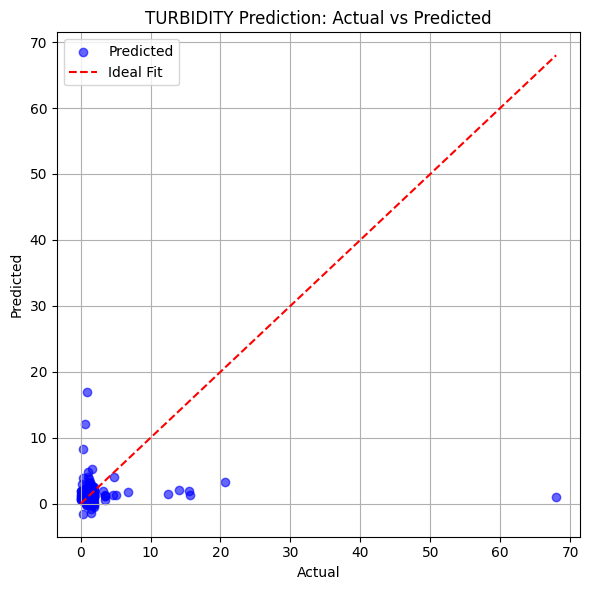

In [ ]:
X_turbidity_train, X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_turbidity_train_scaled = scaler.fit_transform(X_turbidity_train)
X_turbidity_test_scaled = scaler.transform(X_turbidity_test)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_turbidity_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_turbidity_train_scaled, y_turbidity_train, validation_split=0.2,
                    epochs=100, batch_size=16, verbose=1)


y_pred = model.predict(X_turbidity_test_scaled).flatten()


mae = mean_absolute_error(y_turbidity_test, y_pred)
mse = mean_squared_error(y_turbidity_test, y_pred)
r2 = r2_score(y_turbidity_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")


plt.figure(figsize=(6, 6))
plt.scatter(y_turbidity_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_turbidity_test.min(), y_turbidity_test.max()], [y_turbidity_test.min(), y_turbidity_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("TURBIDITY Prediction: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Colour

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 189.1800 - mae: 9.4553 - val_loss: 179.1361 - val_mae: 7.2996
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 221.9625 - mae: 6.8582 - val_loss: 144.7671 - val_mae: 5.6915
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 150.6802 - mae: 5.7845 - val_loss: 144.6452 - val_mae: 5.5615
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 184.6132 - mae: 5.5932 - val_loss: 146.1658 - val_mae: 5.5263
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 116.0855 - mae: 5.6358 - val_loss: 148.5870 - val_mae: 5.4826
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 260.0431 - mae: 6.3320 - val_loss: 150.2394 - val_mae: 5.4432
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 280.3772 - mae: 6.4865 - val_loss: 152.2750 - val_mae: 5.4084
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 171.5087 - mae: 5.5740 - val_loss: 152.7287 - val_mae: 5.4658
Epoch 9/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

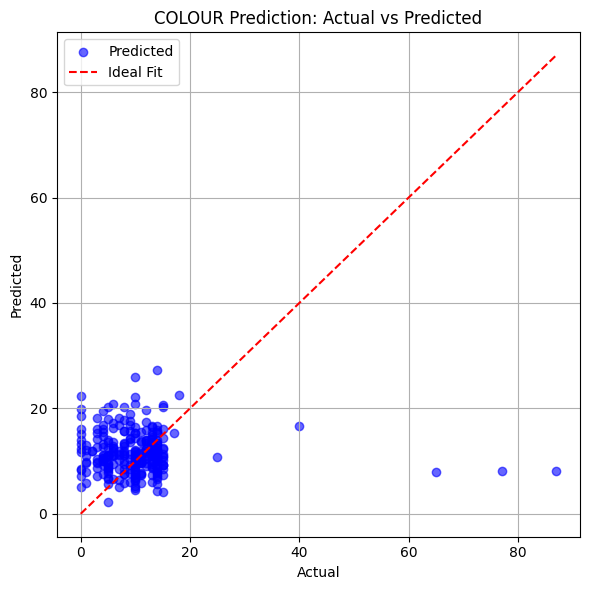

In [ ]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_colour_train_scaled = scaler.fit_transform(X_colour_train)
X_colour_test_scaled = scaler.transform(X_colour_test)


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_colour_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1)
])


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_colour_train_scaled, y_colour_train, validation_split=0.2,
                    epochs=100, batch_size=16, verbose=1)


y_pred = model.predict(X_colour_test_scaled).flatten()


mae = mean_absolute_error(y_colour_test, y_pred)
mse = mean_squared_error(y_colour_test, y_pred)
r2 = r2_score(y_colour_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R² Score: {r2:.3f}")


plt.figure(figsize=(6, 6))
plt.scatter(y_colour_test, y_pred, color='blue', alpha=0.6, label='Predicted')
plt.plot([y_colour_test.min(), y_colour_test.max()], [y_colour_test.min(), y_colour_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("COLOUR Prediction: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()